In [2]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
import time
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols

#Simple OLS Regressions 

To start, I look at simple OLS regressions of each variable on race performance to see if there are any significant associations between them. 

In [4]:
#These data contain weighted averages for ALL days before a race

df = pd.read_csv('final_race_df.csv')
df2 = pd.read_csv('workout_final_race_df.csv')
df.head(20)

,Unnamed: 0,user_id,race_period,resting_heart_rate,hrv_rmssd,time_in_bed,latency,rem_sleep_duration,slow_wave_sleep_duration,light_sleep_duration,wake_duration,cycles_count,score,recovery_score,user_2439,user_2456,user_2458,user_2465,user_2466,user_2468,user_2469,user_2473,user_2508,seconds,pace_per_k,pace_time,FP_5K,Wisco_8K,Brown_8K,VCP_8K,FP_10K,race_course
0,0,828,1,45.180328,0.059197,32983054.4242,1609090.757580,4505000.00000,3321818.18182,20104090.9091,5053636.36364,7.000000,80.984848,65.426230,0,0,0,0,0,0,0,0,0,1529.2,191.1500,03:11.1,0,0,0,0,0,FP_8K
1,1,828,2,47.145833,0.055524,35072882.5625,1245231.197920,3633750.00000,4436562.50000,21996562.5000,5001874.94792,5.437500,91.906250,63.802083,0,0,0,0,0,0,0,0,0,1552.3,194.0375,03:14.0,0,0,1,0,0,Brown_8K
2,2,828,3,45.916667,0.074007,35219680.7292,1261142.541670,1525625.00000,7692187.50000,19688750.0000,6312812.50000,3.364583,87.156250,56.385417,0,0,0,0,0,0,0,0,0,1582.5,197.8125,03:17.8,0,0,0,1,0,VCP_8K
3,3,828,4,44.663366,0.078605,42391598.3267,1041284.366340,3231386.13861,8411584.15842,21082277.2277,9663564.35644,6.584158,96.257426,70.940594,0,0,0,0,0,0,0,0,0,1932.7,193.2700,03:13.3,0,0,0,0,1,FP_10K
4,4,828,5,45.400000,0.066477,35584066.6000,1155980.933330,2920000.00000,7196000.00000,19642000.0000,5788000.00000,5.333333,92.866667,58.733333,0,0,0,0,0,0,0,0,0,1617.6,202.2000,03:22.2,0,0,0,1,0,VCP_8K
5,10,2456,1,43.303571,0.070463,31144514.3214,987083.446429,6983571.30357,3776250.00000,16126607.1429,4293214.28571,6.535714,67.178571,40.071429,0,1,0,0,0,0,0,0,0,1490.9,186.3625,03:06.4,0,0,0,0,0,FP_8K
6,11,2456,2,45.318681,0.078180,32313066.8462,911022.582418,3143076.92308,4748901.09890,21305274.7253,3003296.70330,4.692308,78.010989,67.505495,0,1,0,0,0,0,0,0,0,1476.8,184.6000,03:04.6,0,1,0,0,0,Wisco_8K
7,12,2456,3,45.864078,0.078022,30544817.3204,1090239.621360,2326019.41748,4119902.91262,18572330.0971,5283203.88350,5.029126,66.825243,60.398058,0,1,0,0,0,0,0,0,0,1583.7,197.9625,03:18.0,0,0,0,1,0,VCP_8K
8,13,2456,4,45.394737,0.104513,31598658.1579,1072613.697370,1628684.21053,4693421.05263,19305789.4737,6010263.15789,3.421053,77.881579,71.250000,0,1,0,0,0,0,0,0,0,1907.7,190.7700,03:10.8,0,0,0,0,1,FP_10K
9,14,2456,5,44.111111,0.077258,29843729.7778,1103767.518520,2563333.33333,5328888.88889,16787777.7778,5201111.11111,4.444444,73.740741,50.259259,0,1,0,0,0,0,0,0,0,1550.2,193.7750,03:13.8,0,0,0,1,0,VCP_8K


In [11]:
#creating a variable for total sleep
df['sleep_duration'] = df['rem_sleep_duration'] + df['slow_wave_sleep_duration'] + df['light_sleep_duration']

In [12]:
#merging the two dataframes
reg_df = pd.merge(df, df2, how='left')

In [13]:
#dropping the first column, which was just the index from when saving the dataframe to a csv earlier
reg_df = reg_df.drop(df.columns[0], axis=1)
reg_df.columns

Index([u'user_id', u'race_period', u'resting_heart_rate', u'hrv_rmssd', u'time_in_bed', u'latency', u'rem_sleep_duration', u'slow_wave_sleep_duration', u'light_sleep_duration', u'wake_duration', u'cycles_count', u'score', u'recovery_score', u'user_2439', u'user_2456', u'user_2458', u'user_2465', u'user_2466', u'user_2468', u'user_2469', u'user_2473', u'user_2508', u'seconds', u'pace_per_k', u'pace_time', u'FP_5K', u'Wisco_8K', u'Brown_8K', u'VCP_8K', u'FP_10K', u'race_course',
       u'sleep_duration', u'z1', u'z2', u'z3', u'z4', u'z5'],
      dtype='object')

In [14]:
reg_df.head(20)

,user_id,race_period,resting_heart_rate,hrv_rmssd,time_in_bed,latency,rem_sleep_duration,slow_wave_sleep_duration,light_sleep_duration,wake_duration,cycles_count,score,recovery_score,user_2439,user_2456,user_2458,user_2465,user_2466,user_2468,user_2469,user_2473,user_2508,seconds,pace_per_k,pace_time,FP_5K,Wisco_8K,Brown_8K,VCP_8K,FP_10K,race_course,sleep_duration,z1,z2,z3,z4,z5
0,828,1,45.180328,0.059197,32983054.4242,1609090.757580,4505000.00000,3321818.18182,20104090.9091,5053636.36364,7.000000,80.984848,65.426230,0,0,0,0,0,0,0,0,0,1529.2,191.1500,03:11.1,0,0,0,0,0,FP_8K,27930909.09092,406.527273,702.909091,818.272727,1440.890909,259.927273
1,828,2,47.145833,0.055524,35072882.5625,1245231.197920,3633750.00000,4436562.50000,21996562.5000,5001874.94792,5.437500,91.906250,63.802083,0,0,0,0,0,0,0,0,0,1552.3,194.0375,03:14.0,0,0,1,0,0,Brown_8K,30066875.00000,521.626374,444.879121,769.120879,1471.483516,333.890110
2,828,3,45.916667,0.074007,35219680.7292,1261142.541670,1525625.00000,7692187.50000,19688750.0000,6312812.50000,3.364583,87.156250,56.385417,0,0,0,0,0,0,0,0,0,1582.5,197.8125,03:17.8,0,0,0,1,0,VCP_8K,28906562.50000,750.230769,809.208791,601.439560,1558.263736,202.208791
3,828,4,44.663366,0.078605,42391598.3267,1041284.366340,3231386.13861,8411584.15842,21082277.2277,9663564.35644,6.584158,96.257426,70.940594,0,0,0,0,0,0,0,0,0,1932.7,193.2700,03:13.3,0,0,0,0,1,FP_10K,32725247.52473,472.142857,373.549451,627.571429,1631.318681,151.912088
4,828,5,45.400000,0.066477,35584066.6000,1155980.933330,2920000.00000,7196000.00000,19642000.0000,5788000.00000,5.333333,92.866667,58.733333,0,0,0,0,0,0,0,0,0,1617.6,202.2000,03:22.2,0,0,0,1,0,VCP_8K,29758000.00000,410.321429,412.500000,436.857143,1073.107143,79.535714
5,2456,1,43.303571,0.070463,31144514.3214,987083.446429,6983571.30357,3776250.00000,16126607.1429,4293214.28571,6.535714,67.178571,40.071429,0,1,0,0,0,0,0,0,0,1490.9,186.3625,03:06.4,0,0,0,0,0,FP_8K,26886428.44647,872.454545,755.690909,814.454545,1406.036364,1683.509091
6,2456,2,45.318681,0.078180,32313066.8462,911022.582418,3143076.92308,4748901.09890,21305274.7253,3003296.70330,4.692308,78.010989,67.505495,0,1,0,0,0,0,0,0,0,1476.8,184.6000,03:04.6,0,1,0,0,0,Wisco_8K,29197252.74728,475.153846,486.285714,431.109890,1264.923077,2581.197802
7,2456,3,45.864078,0.078022,30544817.3204,1090239.621360,2326019.41748,4119902.91262,18572330.0971,5283203.88350,5.029126,66.825243,60.398058,0,1,0,0,0,0,0,0,0,1583.7,197.9625,03:18.0,0,0,0,1,0,VCP_8K,25018252.42720,535.989011,464.978022,325.142857,1083.549451,1926.208791
8,2456,4,45.394737,0.104513,31598658.1579,1072613.697370,1628684.21053,4693421.05263,19305789.4737,6010263.15789,3.421053,77.881579,71.250000,0,1,0,0,0,0,0,0,0,1907.7,190.7700,03:10.8,0,0,0,0,1,FP_10K,25627894.73686,502.901099,312.384615,143.714286,401.087912,325.153846
9,2456,5,44.111111,0.077258,29843729.7778,1103767.518520,2563333.33333,5328888.88889,16787777.7778,5201111.11111,4.444444,73.740741,50.259259,0,1,0,0,0,0,0,0,0,1550.2,193.7750,03:13.8,0,0,0,1,0,VCP_8K,24680000.00002,671.750000,260.357143,86.821429,384.500000,802.142857


Here we regress one variable at a time, and also include the dummy variables for both racer and race course.

Significant results:
- light sleep duration, with a p-value of 0.009 but a very small coefficient

In [17]:
result1 = sm.ols(formula="pace_per_k~ hrv_rmssd + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result2 = sm.ols(formula="pace_per_k~ resting_heart_rate + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result3 = sm.ols(formula="pace_per_k~ sleep_duration + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result4 = sm.ols(formula="pace_per_k~ rem_sleep_duration + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result5 = sm.ols(formula="pace_per_k~ slow_wave_sleep_duration + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result6 = sm.ols(formula="pace_per_k~ light_sleep_duration + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result7 = sm.ols(formula="pace_per_k~ time_in_bed + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result8 = sm.ols(formula="pace_per_k~ cycles_count + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result9 = sm.ols(formula="pace_per_k~ time_in_bed + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result10 = sm.ols(formula="pace_per_k~ latency + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result11 = sm.ols(formula="pace_per_k~ score + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result12 = sm.ols(formula="pace_per_k~ recovery_score + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result13 = sm.ols(formula="pace_per_k~ z1 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result14 = sm.ols(formula="pace_per_k~ z2 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result15 = sm.ols(formula="pace_per_k~ z3 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result16 = sm.ols(formula="pace_per_k~ z4 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result17 = sm.ols(formula="pace_per_k~ z5 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()

In [18]:
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             pace_per_k   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     11.36
Date:                Fri, 29 Jan 2016   Prob (F-statistic):           8.09e-07
Time:                        09:49:43   Log-Likelihood:                -83.643
No. Observations:                  36   AIC:                             197.3
Df Residuals:                      21   BIC:                             221.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    192.6618      4.021     47.917      0.000       184.300   201.023
hrv_rmssd    -29.5197     57.907     -0.510      0.616      -149.944    90.905
user_2456     -5.0515      2.268     -2.228      0.037        -9.767    -0.336
user_2458      8.3647      4.580      1.826      0.082        -1.159    17.889
user_2465     -3.5601      2.988     -1.192      0.247        -9.773     2.653
user_2466      5.9813      4.793      1.248      0.226        -3.986    15.949
user_2468     -4.0645      2.149     -1.891      0.072        -8.534     0.405
user_2469      1.3258      2.676      0.495      0.625        -4.239     6.891
user_2473     -7.0749      3.901     -1.814      0.084       -15.187     1.037
user_2508      9.6326      3.640      2.646      0.015         2.063    17.202
FP_5K        -10.2513      4.801     -2.135      0.045       -20.234    -0.268
Wisco_8K       1.5169      1.958      0.775      0.447        -2.555     5.589
Brown_8K      -0.9434      2.817     -0.335      0.741        -6.802     4.915
VCP_8K        10.4525      1.511      6.917      0.000         7.310    13.595
FP_10K         5.0531      2.043      2.473      0.022         0.804     9.302
==============================================================================
Omnibus:                        0.991   Durbin-Watson:                   2.630
Prob(Omnibus):                  0.609   Jarque-Bera (JB):                0.322
Skew:                           0.185   Prob(JB):                        0.851
Kurtosis:                       3.279   Cond. No.                         126.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             pace_per_k   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     11.43
Date:                Fri, 29 Jan 2016   Prob (F-statistic):           7.67e-07
Time:                        09:49:50   Log-Likelihood:                -83.545
No. Observations:                  36   AIC:                             197.1
Df Residuals:                      21   BIC:                             220.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept            177.8540     21.263      8.364      0.000       133.635   222.073
resting_heart_rate     0.2837      0.463      0.613      0.546        -0.679     1.246
user_2456             -5.2328      2.159     -2.423      0.024        -9.723    -0.742
user_2458              7.5398      3.061      2.463      0.023         1.174    13.906
user_2465             -5.3705      2.458     -2.185      0.040       -10.482    -0.258
user_2466              4.1295      2.203      1.875      0.075        -0.452     8.711
user_2468             -3.0767      2.578     -1.193      0.246        -8.438     2.285
user_2469             -1.5628      6.114     -0.256      0.801       -14.278    11.153
user_2473             -7.8755      2.761     -2.852      0.010       -13.618    -2.133
user_2508              8.7432      3.880      2.253      0.035         0.673    16.813
FP_5K                -11.7521      5.305     -2.215      0.038       -22.785    -0.719
Wisco_8K               1.2466      1.912      0.652      0.521        -2.730     5.223
Brown_8K              -1.1413      2.842     -0.402      0.692        -7.051     4.768
VCP_8K                10.3798      1.461      7.103      0.000         7.341    13.419
FP_10K                 4.8099      1.916      2.511      0.020         0.826     8.794
==============================================================================
Omnibus:                        2.641   Durbin-Watson:                   2.594
Prob(Omnibus):                  0.267   Jarque-Bera (JB):                1.464
Skew:                           0.355   Prob(JB):                        0.481
Kurtosis:                       3.687   Cond. No.                     1.92e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.92e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             pace_per_k   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     11.54
Date:                Fri, 29 Jan 2016   Prob (F-statistic):           7.06e-07
Time:                        09:49:53   Log-Likelihood:                -83.392
No. Observations:                  36   AIC:                             196.8
Df Residuals:                      21   BIC:                             220.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept        182.3790     11.478     15.889      0.000       158.509   206.249
sleep_duration  2.796e-07   3.74e-07      0.747      0.464     -4.99e-07  1.06e-06
user_2456         -4.3367      2.584     -1.679      0.108        -9.710     1.036
user_2458          6.4651      2.400      2.694      0.014         1.474    11.456
user_2465         -3.5744      2.547     -1.403      0.175        -8.872     1.723
user_2466          5.2144      2.851      1.829      0.082        -0.715    11.144
user_2468         -3.7690      2.141     -1.760      0.093        -8.222     0.684
user_2469          1.8824      2.434      0.773      0.448        -3.180     6.945
user_2473         -7.2509      3.072     -2.360      0.028       -13.640    -0.862
user_2508         11.2753      4.263      2.645      0.015         2.409    20.141
FP_5K            -12.9209      5.881     -2.197      0.039       -25.150    -0.691
Wisco_8K           0.9010      1.978      0.456      0.653        -3.212     5.014
Brown_8K          -0.8099      2.794     -0.290      0.775        -6.620     5.000
VCP_8K            10.6289      1.532      6.937      0.000         7.442    13.815
FP_10K             4.3527      1.947      2.235      0.036         0.303     8.402
==============================================================================
Omnibus:                        0.664   Durbin-Watson:                   2.550
Prob(Omnibus):                  0.718   Jarque-Bera (JB):                0.175
Skew:                           0.152   Prob(JB):                        0.916
Kurtosis:                       3.156   Cond. No.                     6.73e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.73e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
result4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             pace_per_k   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     12.17
Date:                Fri, 29 Jan 2016   Prob (F-statistic):           4.44e-07
Time:                        09:49:56   Log-Likelihood:                -82.541
No. Observations:                  36   AIC:                             195.1
Df Residuals:                      21   BIC:                             218.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept            192.8308      2.381     80.980      0.000       187.879   197.783
rem_sleep_duration -3.642e-07   2.88e-07     -1.266      0.220     -9.63e-07  2.34e-07
user_2456             -5.2205      2.082     -2.507      0.020        -9.551    -0.890
user_2458              8.6290      2.939      2.936      0.008         2.517    14.741
user_2465             -4.2893      2.092     -2.050      0.053        -8.640     0.062
user_2466              5.2073      2.357      2.210      0.038         0.307    10.108
user_2468             -3.6112      2.094     -1.724      0.099        -7.966     0.744
user_2469              1.6031      2.387      0.672      0.509        -3.361     6.567
user_2473             -6.8419      2.796     -2.447      0.023       -12.657    -1.027
user_2508              9.6871      3.530      2.744      0.012         2.346    17.028
FP_5K                -11.9674      4.826     -2.480      0.022       -22.003    -1.932
Wisco_8K               0.5378      1.954      0.275      0.786        -3.526     4.601
Brown_8K              -0.8665      2.728     -0.318      0.754        -6.539     4.806
VCP_8K                 8.8043      1.794      4.909      0.000         5.074    12.534
FP_10K                 3.3332      2.137      1.560      0.134        -1.111     7.777
==============================================================================
Omnibus:                        1.563   Durbin-Watson:                   2.769
Prob(Omnibus):                  0.458   Jarque-Bera (JB):                0.817
Skew:                           0.351   Prob(JB):                        0.665
Kurtosis:                       3.230   Cond. No.                     6.46e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.46e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
result5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             pace_per_k   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     12.04
Date:                Fri, 29 Jan 2016   Prob (F-statistic):           4.88e-07
Time:                        09:50:00   Log-Likelihood:                -82.716
No. Observations:                  36   AIC:                             195.4
Df Residuals:                      21   BIC:                             219.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Intercept                  193.8662      3.138     61.773      0.000       187.340   200.393
slow_wave_sleep_duration -5.937e-07   5.05e-07     -1.176      0.253     -1.64e-06  4.56e-07
user_2456                   -6.6799      2.339     -2.855      0.009       -11.545    -1.815
user_2458                    6.2931      2.354      2.673      0.014         1.398    11.188
user_2465                   -4.4311      2.092     -2.118      0.046        -8.782    -0.080
user_2466                    1.5712      2.815      0.558      0.583        -4.284     7.426
user_2468                   -4.0500      2.087     -1.941      0.066        -8.390     0.290
user_2469                    0.4423      2.681      0.165      0.871        -5.133     6.018
user_2473                   -9.6521      2.597     -3.717      0.001       -15.053    -4.252
user_2508                    8.0831      3.769      2.144      0.044         0.244    15.922
FP_5K                      -10.2881      4.675     -2.201      0.039       -20.011    -0.565
Wisco_8K                     2.0442      1.968      1.039      0.311        -2.049     6.138
Brown_8K                    -1.3731      2.775     -0.495      0.626        -7.144     4.398
VCP_8K                      11.3770      1.714      6.636      0.000         7.812    14.942
FP_10K                       6.1990      2.264      2.738      0.012         1.491    10.907
==============================================================================
Omnibus:                        0.016   Durbin-Watson:                   2.864
Prob(Omnibus):                  0.992   Jarque-Bera (JB):                0.082
Skew:                           0.019   Prob(JB):                        0.960
Kurtosis:                       2.770   Cond. No.                     6.43e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.43e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
result6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             pace_per_k   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     16.18
Date:                Fri, 29 Jan 2016   Prob (F-statistic):           3.47e-08
Time:                        09:50:03   Log-Likelihood:                -77.916
No. Observations:                  36   AIC:                             185.8
Df Residuals:                      21   BIC:                             209.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept              176.6698      5.185     34.071      0.000       165.886   187.453
light_sleep_duration  7.195e-07   2.51e-07      2.868      0.009      1.98e-07  1.24e-06
user_2456               -3.6994      1.923     -1.924      0.068        -7.698     0.300
user_2458               10.9338      2.600      4.205      0.000         5.527    16.341
user_2465               -1.0338      2.213     -0.467      0.645        -5.636     3.569
user_2466                7.5420      2.245      3.360      0.003         2.874    12.210
user_2468               -2.8725      1.865     -1.541      0.138        -6.750     1.005
user_2469               -0.3695      2.232     -0.166      0.870        -5.012     4.273
user_2473               -2.9268      2.910     -1.006      0.326        -8.978     3.124
user_2508               12.3119      3.246      3.793      0.001         5.562    19.062
FP_5K                  -20.1042      5.321     -3.778      0.001       -31.171    -9.038
Wisco_8K                -0.3657      1.734     -0.211      0.835        -3.972     3.241
Brown_8K                -1.3568      2.405     -0.564      0.579        -6.358     3.645
VCP_8K                   9.8580      1.237      7.967      0.000         7.285    12.431
FP_10K                   3.0047      1.731      1.736      0.097        -0.594     6.604
==============================================================================
Omnibus:                        1.720   Durbin-Watson:                   2.942
Prob(Omnibus):                  0.423   Jarque-Bera (JB):                1.129
Skew:                          -0.099   Prob(JB):                        0.569
Kurtosis:                       2.155   Cond. No.                     3.12e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.12e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
result7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             pace_per_k   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     11.23
Date:                Fri, 29 Jan 2016   Prob (F-statistic):           8.96e-07
Time:                        09:51:08   Log-Likelihood:                -83.831
No. Observations:                  36   AIC:                             197.7
Df Residuals:                      21   BIC:                             221.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept     188.6651     11.195     16.853      0.000       165.384   211.947
time_in_bed  6.136e-08   3.11e-07      0.197      0.846     -5.86e-07  7.09e-07
user_2456      -5.0886      2.775     -1.834      0.081       -10.859     0.682
user_2458       6.4817      2.480      2.613      0.016         1.324    11.640
user_2465      -4.2386      2.904     -1.460      0.159       -10.277     1.800
user_2466       4.0431      2.492      1.622      0.120        -1.140     9.226
user_2468      -3.8268      2.260     -1.693      0.105        -8.527     0.874
user_2469       2.0522      2.627      0.781      0.443        -3.410     7.515
user_2473      -8.2050      3.218     -2.549      0.019       -14.898    -1.512
user_2508      10.0989      4.490      2.249      0.035         0.761    19.437
FP_5K         -10.8653      5.495     -1.977      0.061       -22.294     0.563
Wisco_8K        1.1635      2.059      0.565      0.578        -3.118     5.445
Brown_8K       -0.8632      2.827     -0.305      0.763        -6.742     5.016
VCP_8K         10.2109      1.452      7.032      0.000         7.191    13.231
FP_10K          4.4640      2.217      2.013      0.057        -0.147     9.075
==============================================================================
Omnibus:                        1.153   Durbin-Watson:                   2.644
Prob(Omnibus):                  0.562   Jarque-Bera (JB):                0.426
Skew:                           0.217   Prob(JB):                        0.808
Kurtosis:                       3.309   Cond. No.                     7.75e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.75e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
result8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             pace_per_k   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     12.45
Date:                Fri, 29 Jan 2016   Prob (F-statistic):           3.65e-07
Time:                        09:51:09   Log-Likelihood:                -82.184
No. Observations:                  36   AIC:                             194.4
Df Residuals:                      21   BIC:                             218.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept      194.9773      3.386     57.589      0.000       187.936   202.018
cycles_count    -0.6817      0.476     -1.433      0.166        -1.671     0.307
user_2456       -5.8538      2.076     -2.820      0.010       -10.171    -1.537
user_2458        7.2591      2.398      3.027      0.006         2.272    12.246
user_2465       -4.5983      2.055     -2.237      0.036        -8.872    -0.324
user_2466        4.8987      2.195      2.232      0.037         0.335     9.463
user_2468       -4.1702      2.060     -2.024      0.056        -8.454     0.114
user_2469        1.0924      2.416      0.452      0.656        -3.932     6.117
user_2473       -7.2059      2.592     -2.780      0.011       -12.596    -1.816
user_2508        7.6459      3.747      2.040      0.054        -0.147    15.438
FP_5K          -11.1570      4.641     -2.404      0.026       -20.809    -1.506
Wisco_8K         1.2252      1.839      0.666      0.513        -2.600     5.051
Brown_8K        -0.5918      2.707     -0.219      0.829        -6.222     5.038
VCP_8K           9.4660      1.483      6.382      0.000         6.382    12.550
FP_10K           4.1396      1.872      2.211      0.038         0.246     8.034
==============================================================================
Omnibus:                        0.557   Durbin-Watson:                   2.659
Prob(Omnibus):                  0.757   Jarque-Bera (JB):                0.188
Skew:                           0.174   Prob(JB):                        0.910
Kurtosis:                       3.060   Cond. No.                         62.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
result9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             pace_per_k   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     11.23
Date:                Fri, 29 Jan 2016   Prob (F-statistic):           8.96e-07
Time:                        09:51:12   Log-Likelihood:                -83.831
No. Observations:                  36   AIC:                             197.7
Df Residuals:                      21   BIC:                             221.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept     188.6651     11.195     16.853      0.000       165.384   211.947
time_in_bed  6.136e-08   3.11e-07      0.197      0.846     -5.86e-07  7.09e-07
user_2456      -5.0886      2.775     -1.834      0.081       -10.859     0.682
user_2458       6.4817      2.480      2.613      0.016         1.324    11.640
user_2465      -4.2386      2.904     -1.460      0.159       -10.277     1.800
user_2466       4.0431      2.492      1.622      0.120        -1.140     9.226
user_2468      -3.8268      2.260     -1.693      0.105        -8.527     0.874
user_2469       2.0522      2.627      0.781      0.443        -3.410     7.515
user_2473      -8.2050      3.218     -2.549      0.019       -14.898    -1.512
user_2508      10.0989      4.490      2.249      0.035         0.761    19.437
FP_5K         -10.8653      5.495     -1.977      0.061       -22.294     0.563
Wisco_8K        1.1635      2.059      0.565      0.578        -3.118     5.445
Brown_8K       -0.8632      2.827     -0.305      0.763        -6.742     5.016
VCP_8K         10.2109      1.452      7.032      0.000         7.191    13.231
FP_10K          4.4640      2.217      2.013      0.057        -0.147     9.075
==============================================================================
Omnibus:                        1.153   Durbin-Watson:                   2.644
Prob(Omnibus):                  0.562   Jarque-Bera (JB):                0.426
Skew:                           0.217   Prob(JB):                        0.808
Kurtosis:                       3.309   Cond. No.                     7.75e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.75e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
result10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             pace_per_k   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     11.26
Date:                Fri, 29 Jan 2016   Prob (F-statistic):           8.72e-07
Time:                        09:51:14   Log-Likelihood:                -83.781
No. Observations:                  36   AIC:                             197.6
Df Residuals:                      21   BIC:                             221.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    190.3294      2.469     77.088      0.000       185.195   195.464
latency     4.655e-07   1.49e-06      0.312      0.758     -2.63e-06  3.56e-06
user_2456     -5.3446      2.167     -2.466      0.022        -9.852    -0.838
user_2458      6.3248      2.430      2.603      0.017         1.271    11.378
user_2465     -4.5428      2.164     -2.100      0.048        -9.042    -0.043
user_2466      3.7198      2.162      1.721      0.100        -0.776     8.215
user_2468     -4.2075      2.286     -1.841      0.080        -8.961     0.546
user_2469      2.0095      2.499      0.804      0.430        -3.188     7.207
user_2473     -8.6108      2.511     -3.429      0.003       -13.834    -3.388
user_2508      9.8087      3.722      2.636      0.015         2.069    17.548
FP_5K        -10.5140      4.845     -2.170      0.042       -20.590    -0.438
Wisco_8K       1.3155      1.922      0.684      0.501        -2.682     5.313
Brown_8K      -0.9419      2.835     -0.332      0.743        -6.837     4.953
VCP_8K        10.0985      1.503      6.718      0.000         6.973    13.225
FP_10K         4.6289      1.925      2.405      0.025         0.627     8.631
==============================================================================
Omnibus:                        1.840   Durbin-Watson:                   2.678
Prob(Omnibus):                  0.398   Jarque-Bera (JB):                0.867
Skew:                           0.295   Prob(JB):                        0.648
Kurtosis:                       3.479   Cond. No.                     1.41e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
result11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             pace_per_k   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     12.35
Date:                Fri, 29 Jan 2016   Prob (F-statistic):           3.91e-07
Time:                        09:51:15   Log-Likelihood:                -82.310
No. Observations:                  36   AIC:                             194.6
Df Residuals:                      21   BIC:                             218.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    175.6728     11.165     15.735      0.000       152.455   198.891
score          0.1771      0.129      1.376      0.183        -0.091     0.445
user_2456     -2.2172      3.117     -0.711      0.485        -8.700     4.265
user_2458      5.4233      2.428      2.233      0.037         0.373    10.473
user_2465     -2.0764      2.771     -0.749      0.462        -7.839     3.686
user_2466      7.8926      3.622      2.179      0.041         0.360    15.425
user_2468     -3.3596      2.108     -1.593      0.126        -7.744     1.025
user_2469      1.4870      2.379      0.625      0.539        -3.460     6.434
user_2473     -6.7062      2.776     -2.416      0.025       -12.480    -0.933
user_2508     13.7806      4.646      2.966      0.007         4.118    23.443
FP_5K        -17.0809      6.732     -2.537      0.019       -31.081    -3.080
Wisco_8K      -0.2215      2.154     -0.103      0.919        -4.700     4.257
Brown_8K      -1.4536      2.744     -0.530      0.602        -7.160     4.253
VCP_8K         9.7310      1.436      6.776      0.000         6.745    12.717
FP_10K         2.5605      2.401      1.066      0.298        -2.433     7.554
==============================================================================
Omnibus:                        0.321   Durbin-Watson:                   2.419
Prob(Omnibus):                  0.852   Jarque-Bera (JB):                0.089
Skew:                           0.121   Prob(JB):                        0.957
Kurtosis:                       2.982   Cond. No.                     2.18e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
result12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             pace_per_k   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     11.21
Date:                Fri, 29 Jan 2016   Prob (F-statistic):           9.07e-07
Time:                        09:51:16   Log-Likelihood:                -83.853
No. Observations:                  36   AIC:                             197.7
Df Residuals:                      21   BIC:                             221.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept        190.2984      5.139     37.032      0.000       179.612   200.985
recovery_score     0.0094      0.083      0.113      0.911        -0.163     0.181
user_2456         -5.3745      2.216     -2.426      0.024        -9.982    -0.767
user_2458          6.2372      2.740      2.276      0.033         0.539    11.935
user_2465         -4.6435      2.160     -2.149      0.043        -9.136    -0.151
user_2466          3.8478      2.202      1.747      0.095        -0.732     8.428
user_2468         -3.9831      2.160     -1.844      0.079        -8.475     0.508
user_2469          1.8210      2.508      0.726      0.476        -3.395     7.037
user_2473         -8.6932      2.646     -3.285      0.004       -14.196    -3.190
user_2508          9.7313      3.880      2.508      0.020         1.663    17.800
FP_5K            -10.7026      5.764     -1.857      0.077       -22.690     1.285
Wisco_8K           1.1997      2.148      0.558      0.582        -3.268     5.668
Brown_8K          -0.9142      2.867     -0.319      0.753        -6.875     5.047
VCP_8K            10.1844      1.493      6.821      0.000         7.079    13.290
FP_10K             4.5747      2.145      2.133      0.045         0.114     9.036
==============================================================================
Omnibus:                        1.324   Durbin-Watson:                   2.694
Prob(Omnibus):                  0.516   Jarque-Bera (JB):                0.545
Skew:                           0.253   Prob(JB):                        0.761
Kurtosis:                       3.328   Cond. No.                         903.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
result13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             pace_per_k   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     11.21
Date:                Fri, 29 Jan 2016   Prob (F-statistic):           9.13e-07
Time:                        09:51:19   Log-Likelihood:                -83.864
No. Observations:                  36   AIC:                             197.7
Df Residuals:                      21   BIC:                             221.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    190.8715      2.698     70.753      0.000       185.261   196.482
z1         -4.283e-05      0.003     -0.016      0.987        -0.006     0.006
user_2456     -5.4298      2.168     -2.504      0.021        -9.939    -0.920
user_2458      6.3953      2.594      2.465      0.022         1.001    11.790
user_2465     -4.6245      2.156     -2.145      0.044        -9.108    -0.141
user_2466      3.7982      2.162      1.757      0.093        -0.697     8.293
user_2468     -3.9604      2.161     -1.833      0.081        -8.454     0.533
user_2469      1.9076      3.284      0.581      0.568        -4.922     8.737
user_2473     -8.5979      2.523     -3.408      0.003       -13.845    -3.351
user_2508      9.5821      3.668      2.612      0.016         1.954    17.211
FP_5K        -10.3712      5.077     -2.043      0.054       -20.928     0.186
Wisco_8K       1.3001      1.979      0.657      0.518        -2.816     5.416
Brown_8K      -0.8700      2.875     -0.303      0.765        -6.849     5.109
VCP_8K        10.2124      1.622      6.298      0.000         6.840    13.585
FP_10K         4.6671      2.156      2.165      0.042         0.183     9.151
==============================================================================
Omnibus:                        1.375   Durbin-Watson:                   2.688
Prob(Omnibus):                  0.503   Jarque-Bera (JB):                0.571
Skew:                           0.255   Prob(JB):                        0.752
Kurtosis:                       3.349   Cond. No.                     8.03e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
result14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             pace_per_k   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     11.35
Date:                Fri, 29 Jan 2016   Prob (F-statistic):           8.15e-07
Time:                        09:51:20   Log-Likelihood:                -83.656
No. Observations:                  36   AIC:                             197.3
Df Residuals:                      21   BIC:                             221.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    192.0613      3.082     62.323      0.000       185.652   198.470
z2            -0.0017      0.003     -0.495      0.626        -0.009     0.005
user_2456     -5.6190      2.173     -2.585      0.017       -10.139    -1.099
user_2458      6.6776      2.489      2.683      0.014         1.502    11.853
user_2465     -4.7499      2.156     -2.203      0.039        -9.234    -0.266
user_2466      4.2458      2.327      1.825      0.082        -0.593     9.085
user_2468     -3.4607      2.370     -1.460      0.159        -8.389     1.468
user_2469      2.3043      2.603      0.885      0.386        -3.108     7.717
user_2473     -8.9787      2.617     -3.431      0.003       -14.420    -3.537
user_2508      9.5269      3.642      2.616      0.016         1.953    17.101
FP_5K        -11.3860      5.239     -2.173      0.041       -22.282    -0.490
Wisco_8K       1.1920      1.929      0.618      0.543        -2.821     5.205
Brown_8K      -1.1364      2.868     -0.396      0.696        -7.100     4.827
VCP_8K         9.8713      1.610      6.131      0.000         6.523    13.220
FP_10K         4.0957      2.249      1.821      0.083        -0.581     8.773
==============================================================================
Omnibus:                        1.245   Durbin-Watson:                   2.699
Prob(Omnibus):                  0.536   Jarque-Bera (JB):                0.481
Skew:                           0.229   Prob(JB):                        0.786
Kurtosis:                       3.332   Cond. No.                     7.84e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
result15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             pace_per_k   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     12.17
Date:                Fri, 29 Jan 2016   Prob (F-statistic):           4.44e-07
Time:                        09:51:21   Log-Likelihood:                -82.542
No. Observations:                  36   AIC:                             195.1
Df Residuals:                      21   BIC:                             218.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    188.7387      2.440     77.345      0.000       183.664   193.813
z3             0.0027      0.002      1.265      0.220        -0.002     0.007
user_2456     -4.6460      2.167     -2.144      0.044        -9.153    -0.140
user_2458      5.9609      2.365      2.521      0.020         1.043    10.879
user_2465     -5.4953      2.187     -2.513      0.020       -10.044    -0.947
user_2466      1.9498      2.537      0.769      0.451        -3.326     7.225
user_2468     -4.9826      2.226     -2.238      0.036        -9.613    -0.352
user_2469      1.0570      2.463      0.429      0.672        -4.066     6.180
user_2473     -7.5725      2.559     -2.959      0.007       -12.894    -2.251
user_2508      9.1684      3.544      2.587      0.017         1.797    16.540
FP_5K         -8.3216      4.920     -1.691      0.106       -18.553     1.910
Wisco_8K       0.8509      1.892      0.450      0.657        -3.083     4.785
Brown_8K      -1.3124      2.751     -0.477      0.638        -7.033     4.408
VCP_8K        10.8138      1.475      7.331      0.000         7.746    13.881
FP_10K         5.6492      2.003      2.820      0.010         1.483     9.815
==============================================================================
Omnibus:                        0.018   Durbin-Watson:                   2.686
Prob(Omnibus):                  0.991   Jarque-Bera (JB):                0.103
Skew:                           0.039   Prob(JB):                        0.950
Kurtosis:                       2.750   Cond. No.                     1.03e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
result16.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             pace_per_k   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     11.52
Date:                Fri, 29 Jan 2016   Prob (F-statistic):           7.20e-07
Time:                        09:51:22   Log-Likelihood:                -83.427
No. Observations:                  36   AIC:                             196.9
Df Residuals:                      21   BIC:                             220.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    189.0170      3.131     60.379      0.000       182.507   195.527
z4             0.0010      0.001      0.718      0.480        -0.002     0.004
user_2456     -4.8650      2.270     -2.143      0.044        -9.586    -0.144
user_2458      6.1482      2.421      2.539      0.019         1.112    11.184
user_2465     -4.0196      2.287     -1.758      0.093        -8.776     0.737
user_2466      3.3138      2.230      1.486      0.152        -1.324     7.952
user_2468     -4.1478      2.143     -1.936      0.066        -8.604     0.308
user_2469      1.8021      2.439      0.739      0.468        -3.269     6.874
user_2473     -8.2216      2.542     -3.234      0.004       -13.508    -2.935
user_2508      9.7015      3.621      2.680      0.014         2.172    17.231
FP_5K         -8.7892      5.238     -1.678      0.108       -19.682     2.103
Wisco_8K       1.1390      1.918      0.594      0.559        -2.849     5.127
Brown_8K      -0.9091      2.796     -0.325      0.748        -6.724     4.906
VCP_8K        10.7526      1.612      6.669      0.000         7.400    14.105
FP_10K         5.3741      2.128      2.525      0.020         0.948     9.800
==============================================================================
Omnibus:                        0.446   Durbin-Watson:                   2.637
Prob(Omnibus):                  0.800   Jarque-Bera (JB):                0.039
Skew:                           0.052   Prob(JB):                        0.981
Kurtosis:                       3.124   Cond. No.                     1.68e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.68e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
result17.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             pace_per_k   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     11.21
Date:                Fri, 29 Jan 2016   Prob (F-statistic):           9.10e-07
Time:                        09:51:23   Log-Likelihood:                -83.858
No. Observations:                  36   AIC:                             197.7
Df Residuals:                      21   BIC:                             221.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    190.7922      1.939     98.393      0.000       186.760   194.825
z5             0.0002      0.002      0.085      0.933        -0.004     0.004
user_2456     -5.6426      3.272     -1.725      0.099       -12.447     1.162
user_2458      6.4103      2.454      2.613      0.016         1.308    11.513
user_2465     -4.5893      2.189     -2.096      0.048        -9.142    -0.037
user_2466      3.7953      2.153      1.763      0.092        -0.682     8.273
user_2468     -3.9680      2.154     -1.842      0.080        -8.447     0.511
user_2469      1.9003      2.487      0.764      0.453        -3.272     7.072
user_2473     -8.5535      2.578     -3.318      0.003       -13.914    -3.193
user_2508      9.6031      3.666      2.619      0.016         1.979    17.227
FP_5K        -10.3158      4.839     -2.132      0.045       -20.379    -0.253
Wisco_8K       1.2529      2.031      0.617      0.544        -2.970     5.476
Brown_8K      -0.8715      2.832     -0.308      0.761        -6.760     5.017
VCP_8K        10.2328      1.455      7.031      0.000         7.206    13.260
FP_10K         4.7371      2.025      2.339      0.029         0.526     8.949
==============================================================================
Omnibus:                        1.337   Durbin-Watson:                   2.688
Prob(Omnibus):                  0.513   Jarque-Bera (JB):                0.546
Skew:                           0.249   Prob(JB):                        0.761
Kurtosis:                       3.342   Cond. No.                     6.81e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.81e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

###10 days weighted
To avoid printing everything, I run the same analysis for the other weighted average dataframes, and summarize any significant results below:

In [104]:
df = pd.read_csv('final_race_df_10daysweighted.csv')
df2 = pd.read_csv('workout_final_race_df_10daysweighted.csv')
df['sleep_duration'] = df['rem_sleep_duration'] + df['slow_wave_sleep_duration'] + df['light_sleep_duration']
reg_df = pd.merge(df, df2, how='left')
reg_df = reg_df.drop(df.columns[0], axis=1)

result1 = sm.ols(formula="pace_per_k~ hrv_rmssd + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result1 = sm.ols(formula="pace_per_k~ hrv_rmssd + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result2 = sm.ols(formula="pace_per_k~ resting_heart_rate + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result3 = sm.ols(formula="pace_per_k~ sleep_duration + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result4 = sm.ols(formula="pace_per_k~ rem_sleep_duration + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result5 = sm.ols(formula="pace_per_k~ slow_wave_sleep_duration + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result6 = sm.ols(formula="pace_per_k~ light_sleep_duration + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result7 = sm.ols(formula="pace_per_k~ time_in_bed + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result8 = sm.ols(formula="pace_per_k~ cycles_count + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result9 = sm.ols(formula="pace_per_k~ time_in_bed + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result10 = sm.ols(formula="pace_per_k~ latency + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result11 = sm.ols(formula="pace_per_k~ score + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result12 = sm.ols(formula="pace_per_k~ recovery_score + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result13 = sm.ols(formula="pace_per_k~ z1 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result14 = sm.ols(formula="pace_per_k~ z2 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result15 = sm.ols(formula="pace_per_k~ z3 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result16 = sm.ols(formula="pace_per_k~ z4 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result17 = sm.ols(formula="pace_per_k~ z5 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()

Significant results:
- light sleep duration, weighted 10 days. It has a very small coefficient but p-value of 0.011
- light sleep duration, weighted 7 days. It has a very small coefficient  but p-value at 0.022
- light sleep duration, weighted 6 days. It has a very small coefficient  but p-value at 0.024
- light sleep duration, weighted 5 days. It has a very small coefficient but p-value at 0.015
- light sleep duration, weighted 4 days. It has a very small coefficient but p-value at 0.14
- sleep score, weighted 4 days. The coefficient is 0.22 and the p-value is 0.05
- REM sleep duration, weighted 3 days. The coefficient is very small and the pvalue is 0.08
- light sleep duration, weighted 3 days. The coefficient is very small and the pvalue is 0.05
- sleep latency, weighted 3 days. The coefficient is very small, the p-value is 0.023
- sleep score, weighted 3 days. The coefficient is 0.26 and the p-value is 0.085
- REM sleepd duration, weighted 2 days. Coefficient is very small, p-value 0.056
- light sleep duration, weighted 2 days. Coefficient is very small, p-value is 0.077
- sleep latency, weighted 2 days. Coefficient is very small, p-value is 0.004
- sleep score, weighted 2 days. Coefficient is 0.27, p-value is 0.063

In [105]:
print result6.summary()

                            OLS Regression Results                            
Dep. Variable:             pace_per_k   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     15.94
Date:                Fri, 29 Jan 2016   Prob (F-statistic):           3.99e-08
Time:                        10:10:35   Log-Likelihood:                -78.166
No. Observations:                  36   AIC:                             186.3
Df Residuals:                      21   BIC:                             210.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept              176.6892 

###7 Days weighted

In [58]:
df = pd.read_csv('final_race_df_7daysweighted.csv')
df2 = pd.read_csv('workout_final_race_df_7daysweighted.csv')
df['sleep_duration'] = df['rem_sleep_duration'] + df['slow_wave_sleep_duration'] + df['light_sleep_duration']
reg_df = pd.merge(df, df2, how='left')
reg_df = reg_df.drop(df.columns[0], axis=1)

result1 = sm.ols(formula="pace_per_k~ hrv_rmssd + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result1 = sm.ols(formula="pace_per_k~ hrv_rmssd + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result2 = sm.ols(formula="pace_per_k~ resting_heart_rate + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result3 = sm.ols(formula="pace_per_k~ sleep_duration + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result4 = sm.ols(formula="pace_per_k~ rem_sleep_duration + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result5 = sm.ols(formula="pace_per_k~ slow_wave_sleep_duration + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result6 = sm.ols(formula="pace_per_k~ light_sleep_duration + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result7 = sm.ols(formula="pace_per_k~ time_in_bed + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result8 = sm.ols(formula="pace_per_k~ cycles_count + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result9 = sm.ols(formula="pace_per_k~ time_in_bed + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result10 = sm.ols(formula="pace_per_k~ latency + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result11 = sm.ols(formula="pace_per_k~ score + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result12 = sm.ols(formula="pace_per_k~ recovery_score + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result13 = sm.ols(formula="pace_per_k~ z1 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result14 = sm.ols(formula="pace_per_k~ z2 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result15 = sm.ols(formula="pace_per_k~ z3 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result16 = sm.ols(formula="pace_per_k~ z4 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result17 = sm.ols(formula="pace_per_k~ z5 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()

In [65]:
print result6.summary()

                            OLS Regression Results                            
Dep. Variable:             pace_per_k   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     14.90
Date:                Fri, 29 Jan 2016   Prob (F-statistic):           7.34e-08
Time:                        10:02:22   Log-Likelihood:                -79.269
No. Observations:                  36   AIC:                             188.5
Df Residuals:                      21   BIC:                             212.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept              178.3246 

###Weighted 6 Days

In [77]:
df = pd.read_csv('final_race_df_6daysweighted.csv')
df2 = pd.read_csv('workout_final_race_df_6daysweighted.csv')
df['sleep_duration'] = df['rem_sleep_duration'] + df['slow_wave_sleep_duration'] + df['light_sleep_duration']
reg_df = pd.merge(df, df2, how='left')
reg_df = reg_df.drop(df.columns[0], axis=1)

result1 = sm.ols(formula="pace_per_k~ hrv_rmssd + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result1 = sm.ols(formula="pace_per_k~ hrv_rmssd + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result2 = sm.ols(formula="pace_per_k~ resting_heart_rate + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result3 = sm.ols(formula="pace_per_k~ sleep_duration + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result4 = sm.ols(formula="pace_per_k~ rem_sleep_duration + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result5 = sm.ols(formula="pace_per_k~ slow_wave_sleep_duration + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result6 = sm.ols(formula="pace_per_k~ light_sleep_duration + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result7 = sm.ols(formula="pace_per_k~ time_in_bed + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result8 = sm.ols(formula="pace_per_k~ cycles_count + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result9 = sm.ols(formula="pace_per_k~ time_in_bed + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result10 = sm.ols(formula="pace_per_k~ latency + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result11 = sm.ols(formula="pace_per_k~ score + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result12 = sm.ols(formula="pace_per_k~ recovery_score + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result13 = sm.ols(formula="pace_per_k~ z1 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result14 = sm.ols(formula="pace_per_k~ z2 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result15 = sm.ols(formula="pace_per_k~ z3 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result16 = sm.ols(formula="pace_per_k~ z4 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result17 = sm.ols(formula="pace_per_k~ z5 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()

In [95]:
print result6.summary()

                            OLS Regression Results                            
Dep. Variable:             pace_per_k   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     14.76
Date:                Fri, 29 Jan 2016   Prob (F-statistic):           7.98e-08
Time:                        10:07:57   Log-Likelihood:                -79.419
No. Observations:                  36   AIC:                             188.8
Df Residuals:                      21   BIC:                             212.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept              178.8417 

###5 days weighted

In [96]:
df = pd.read_csv('final_race_df_5daysweighted.csv')
df2 = pd.read_csv('workout_final_race_df_5daysweighted.csv')
df['sleep_duration'] = df['rem_sleep_duration'] + df['slow_wave_sleep_duration'] + df['light_sleep_duration']
reg_df = pd.merge(df, df2, how='left')
reg_df = reg_df.drop(df.columns[0], axis=1)

result1 = sm.ols(formula="pace_per_k~ hrv_rmssd + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result1 = sm.ols(formula="pace_per_k~ hrv_rmssd + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result2 = sm.ols(formula="pace_per_k~ resting_heart_rate + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result3 = sm.ols(formula="pace_per_k~ sleep_duration + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result4 = sm.ols(formula="pace_per_k~ rem_sleep_duration + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result5 = sm.ols(formula="pace_per_k~ slow_wave_sleep_duration + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result6 = sm.ols(formula="pace_per_k~ light_sleep_duration + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result7 = sm.ols(formula="pace_per_k~ time_in_bed + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result8 = sm.ols(formula="pace_per_k~ cycles_count + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result9 = sm.ols(formula="pace_per_k~ time_in_bed + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result10 = sm.ols(formula="pace_per_k~ latency + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result11 = sm.ols(formula="pace_per_k~ score + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result12 = sm.ols(formula="pace_per_k~ recovery_score + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result13 = sm.ols(formula="pace_per_k~ z1 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result14 = sm.ols(formula="pace_per_k~ z2 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result15 = sm.ols(formula="pace_per_k~ z3 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result16 = sm.ols(formula="pace_per_k~ z4 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result17 = sm.ols(formula="pace_per_k~ z5 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()

In [117]:
print result6.summary()

                            OLS Regression Results                            
Dep. Variable:             pace_per_k   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     15.94
Date:                Fri, 29 Jan 2016   Prob (F-statistic):           3.99e-08
Time:                        10:11:25   Log-Likelihood:                -78.166
No. Observations:                  36   AIC:                             186.3
Df Residuals:                      21   BIC:                             210.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept              176.6892 

###4 days weighted

In [118]:
df = pd.read_csv('final_race_df_4daysweighted.csv')
df2 = pd.read_csv('workout_final_race_df_4daysweighted.csv')
df['sleep_duration'] = df['rem_sleep_duration'] + df['slow_wave_sleep_duration'] + df['light_sleep_duration']
reg_df = pd.merge(df, df2, how='left')
reg_df = reg_df.drop(df.columns[0], axis=1)

result1 = sm.ols(formula="pace_per_k~ hrv_rmssd + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result1 = sm.ols(formula="pace_per_k~ hrv_rmssd + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result2 = sm.ols(formula="pace_per_k~ resting_heart_rate + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result3 = sm.ols(formula="pace_per_k~ sleep_duration + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result4 = sm.ols(formula="pace_per_k~ rem_sleep_duration + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result5 = sm.ols(formula="pace_per_k~ slow_wave_sleep_duration + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result6 = sm.ols(formula="pace_per_k~ light_sleep_duration + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result7 = sm.ols(formula="pace_per_k~ time_in_bed + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result8 = sm.ols(formula="pace_per_k~ cycles_count + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result9 = sm.ols(formula="pace_per_k~ time_in_bed + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result10 = sm.ols(formula="pace_per_k~ latency + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result11 = sm.ols(formula="pace_per_k~ score + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result12 = sm.ols(formula="pace_per_k~ recovery_score + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result13 = sm.ols(formula="pace_per_k~ z1 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result14 = sm.ols(formula="pace_per_k~ z2 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result15 = sm.ols(formula="pace_per_k~ z3 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result16 = sm.ols(formula="pace_per_k~ z4 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result17 = sm.ols(formula="pace_per_k~ z5 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()

In [136]:
print result6.summary()

                            OLS Regression Results                            
Dep. Variable:             pace_per_k   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     15.51
Date:                Fri, 29 Jan 2016   Prob (F-statistic):           5.10e-08
Time:                        10:17:02   Log-Likelihood:                -78.611
No. Observations:                  36   AIC:                             187.2
Df Residuals:                      21   BIC:                             211.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept              179.1124 

In [129]:
print result11.summary()

                            OLS Regression Results                            
Dep. Variable:             pace_per_k   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     13.81
Date:                Fri, 29 Jan 2016   Prob (F-statistic):           1.45e-07
Time:                        10:14:57   Log-Likelihood:                -80.502
No. Observations:                  36   AIC:                             191.0
Df Residuals:                      21   BIC:                             214.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    171.0465      9.680     17.670      0.0

###3 days weighted

In [137]:
df = pd.read_csv('final_race_df_3daysweighted.csv')
df2 = pd.read_csv('workout_final_race_df_3daysweighted.csv')
df['sleep_duration'] = df['rem_sleep_duration'] + df['slow_wave_sleep_duration'] + df['light_sleep_duration']
reg_df = pd.merge(df, df2, how='left')
reg_df = reg_df.drop(df.columns[0], axis=1)

result1 = sm.ols(formula="pace_per_k~ hrv_rmssd + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result1 = sm.ols(formula="pace_per_k~ hrv_rmssd + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result2 = sm.ols(formula="pace_per_k~ resting_heart_rate + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result3 = sm.ols(formula="pace_per_k~ sleep_duration + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result4 = sm.ols(formula="pace_per_k~ rem_sleep_duration + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result5 = sm.ols(formula="pace_per_k~ slow_wave_sleep_duration + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result6 = sm.ols(formula="pace_per_k~ light_sleep_duration + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result7 = sm.ols(formula="pace_per_k~ time_in_bed + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result8 = sm.ols(formula="pace_per_k~ cycles_count + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result9 = sm.ols(formula="pace_per_k~ time_in_bed + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result10 = sm.ols(formula="pace_per_k~ latency + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result11 = sm.ols(formula="pace_per_k~ score + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result12 = sm.ols(formula="pace_per_k~ recovery_score + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result13 = sm.ols(formula="pace_per_k~ z1 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result14 = sm.ols(formula="pace_per_k~ z2 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result15 = sm.ols(formula="pace_per_k~ z3 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result16 = sm.ols(formula="pace_per_k~ z4 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result17 = sm.ols(formula="pace_per_k~ z5 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()

In [149]:
print result11.summary()

                            OLS Regression Results                            
Dep. Variable:             pace_per_k   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     13.47
Date:                Fri, 29 Jan 2016   Prob (F-statistic):           3.05e-07
Time:                        10:23:06   Log-Likelihood:                -78.385
No. Observations:                  35   AIC:                             186.8
Df Residuals:                      20   BIC:                             210.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    166.7038     13.354     12.484      0.0

In [148]:
print result10.summary()

                            OLS Regression Results                            
Dep. Variable:             pace_per_k   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     15.21
Date:                Fri, 29 Jan 2016   Prob (F-statistic):           1.07e-07
Time:                        10:22:51   Log-Likelihood:                -76.447
No. Observations:                  35   AIC:                             182.9
Df Residuals:                      20   BIC:                             206.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    184.7577      2.923     63.205      0.0

In [143]:
print result6.summary()

                            OLS Regression Results                            
Dep. Variable:             pace_per_k   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     14.16
Date:                Fri, 29 Jan 2016   Prob (F-statistic):           1.99e-07
Time:                        10:20:04   Log-Likelihood:                -77.592
No. Observations:                  35   AIC:                             185.2
Df Residuals:                      20   BIC:                             208.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept              179.4310 

In [141]:
print result4.summary()

                            OLS Regression Results                            
Dep. Variable:             pace_per_k   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     13.51
Date:                Fri, 29 Jan 2016   Prob (F-statistic):           2.98e-07
Time:                        10:18:04   Log-Likelihood:                -78.342
No. Observations:                  35   AIC:                             186.7
Df Residuals:                      20   BIC:                             210.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept            193.3746      2

###2 days weighted

In [157]:
df = pd.read_csv('final_race_df_2daysweighted.csv')
df2 = pd.read_csv('workout_final_race_df_2daysweighted.csv')
df['sleep_duration'] = df['rem_sleep_duration'] + df['slow_wave_sleep_duration'] + df['light_sleep_duration']
reg_df = pd.merge(df, df2, how='left')
reg_df = reg_df.drop(df.columns[0], axis=1)

result1 = sm.ols(formula="pace_per_k~ hrv_rmssd + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result1 = sm.ols(formula="pace_per_k~ hrv_rmssd + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result2 = sm.ols(formula="pace_per_k~ resting_heart_rate + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result3 = sm.ols(formula="pace_per_k~ sleep_duration + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result4 = sm.ols(formula="pace_per_k~ rem_sleep_duration + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result5 = sm.ols(formula="pace_per_k~ slow_wave_sleep_duration + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result6 = sm.ols(formula="pace_per_k~ light_sleep_duration + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result7 = sm.ols(formula="pace_per_k~ time_in_bed + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result8 = sm.ols(formula="pace_per_k~ cycles_count + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result9 = sm.ols(formula="pace_per_k~ time_in_bed + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result10 = sm.ols(formula="pace_per_k~ latency + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result11 = sm.ols(formula="pace_per_k~ score + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result12 = sm.ols(formula="pace_per_k~ recovery_score + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result13 = sm.ols(formula="pace_per_k~ z1 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result14 = sm.ols(formula="pace_per_k~ z2 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result15 = sm.ols(formula="pace_per_k~ z3 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result16 = sm.ols(formula="pace_per_k~ z4 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result17 = sm.ols(formula="pace_per_k~ z5 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()

In [168]:
print result11.summary()

                            OLS Regression Results                            
Dep. Variable:             pace_per_k   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     12.94
Date:                Fri, 29 Jan 2016   Prob (F-statistic):           7.17e-07
Time:                        10:26:35   Log-Likelihood:                -75.938
No. Observations:                  34   AIC:                             181.9
Df Residuals:                      19   BIC:                             204.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    166.1200     12.446     13.347      0.0

In [167]:
print result10.summary()

                            OLS Regression Results                            
Dep. Variable:             pace_per_k   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     17.19
Date:                Fri, 29 Jan 2016   Prob (F-statistic):           6.87e-08
Time:                        10:26:23   Log-Likelihood:                -71.510
No. Observations:                  34   AIC:                             173.0
Df Residuals:                      19   BIC:                             195.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    183.1758      2.757     66.443      0.0

In [163]:
print result6.summary()

                            OLS Regression Results                            
Dep. Variable:             pace_per_k   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     12.68
Date:                Fri, 29 Jan 2016   Prob (F-statistic):           8.45e-07
Time:                        10:25:51   Log-Likelihood:                -76.248
No. Observations:                  34   AIC:                             182.5
Df Residuals:                      19   BIC:                             205.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept              180.4680 

In [161]:
print result4.summary()

                            OLS Regression Results                            
Dep. Variable:             pace_per_k   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     13.08
Date:                Fri, 29 Jan 2016   Prob (F-statistic):           6.55e-07
Time:                        10:25:32   Log-Likelihood:                -75.764
No. Observations:                  34   AIC:                             181.5
Df Residuals:                      19   BIC:                             204.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept            193.1159      2

#Looking at just the 5 individual days before the race - OLS regressions

###The night before the race (when buildup_day = 0, as that sleep data is from the night before)

Some things that came up as significant, but likely because of random error

- Latency is significant the night before the race, but the coefficient is basically zero with a pvalue of 0.002
- Sleep score has a coefficient of 0.21 and p-pvalue of 0.08

In [169]:
df = pd.read_csv('race_df_pre_weighting.csv')
df['sleep_duration'] = df['rem_sleep_duration'] + df['slow_wave_sleep_duration'] + df['light_sleep_duration']
dummies = pd.get_dummies(df['user_id'], prefix='user')
temp_df = pd.concat([df, dummies], axis=1)
race_times = pd.read_csv('huxc_race_times.csv')
race_times=race_times[race_times['user_id']!=2461]
race_times=race_times[race_times['user_id']!=2509]
reg_df = temp_df.merge(race_times, how='left')
reg_df = reg_df[reg_df['user_id']!=2439]
reg_df = reg_df.drop(['user_828'], axis=1)
reg_df = reg_df.drop(df.columns[0], axis=1).reset_index(drop=True)

#Use to see if each of the 5 days leading up to a race have significant variables
reg_df0 = reg_df[reg_df['buildup_days']==0].reset_index(drop=True)
reg_df1 = reg_df[reg_df['buildup_days']==1].reset_index(drop=True)
reg_df2 = reg_df[reg_df['buildup_days']==2].reset_index(drop=True)
reg_df3 = reg_df[reg_df['buildup_days']==3].reset_index(drop=True)
reg_df4 = reg_df[reg_df['buildup_days']==4].reset_index(drop=True)
reg_df5 = reg_df[reg_df['buildup_days']==5].reset_index(drop=True)
reg_df6 = reg_df[reg_df['buildup_days']==6].reset_index(drop=True)
reg_df7 = reg_df[reg_df['buildup_days']==7].reset_index(drop=True)
reg_df8 = reg_df[reg_df['buildup_days']==8].reset_index(drop=True)
reg_df9 = reg_df[reg_df['buildup_days']==9].reset_index(drop=True)
reg_df10 = reg_df[reg_df['buildup_days']==10].reset_index(drop=True)

####Only showing results that came up significant

In [173]:
def ols_regressions(y_var, x_vars, df):
    return sm.ols(formula= y_var + "~ " + x_vars + " + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=df).fit().summary()

In [188]:
result1 = ols_regressions('pace_per_k', 'hrv_rmssd', reg_df0)
result2 = ols_regressions('pace_per_k', 'resting_heart_rate', reg_df0)
result3 = ols_regressions('pace_per_k', 'sleep_duration', reg_df0)
result4 = ols_regressions('pace_per_k', 'rem_sleep_duration', reg_df0)
result5 = ols_regressions('pace_per_k', 'slow_wave_sleep_duration', reg_df0)
result6 = ols_regressions('pace_per_k', 'light_sleep_duration', reg_df0)
result7 = ols_regressions('pace_per_k', 'time_in_bed', reg_df0)
result8 = ols_regressions('pace_per_k', 'cycles_count', reg_df0)
result9 = ols_regressions('pace_per_k', 'latency', reg_df0)
result10 = ols_regressions('pace_per_k', 'score', reg_df0)
result11 = ols_regressions('pace_per_k', 'recovery_score', reg_df0)

In [205]:
print result10

                            OLS Regression Results                            
Dep. Variable:             pace_per_k   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     15.17
Date:                Fri, 29 Jan 2016   Prob (F-statistic):           4.26e-06
Time:                        11:20:22   Log-Likelihood:                -59.572
No. Observations:                  29   AIC:                             149.1
Df Residuals:                      14   BIC:                             169.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    170.8008     10.554     16.184      0.0

In [203]:
print result9

                            OLS Regression Results                            
Dep. Variable:             pace_per_k   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     24.64
Date:                Fri, 29 Jan 2016   Prob (F-statistic):           1.92e-07
Time:                        11:20:22   Log-Likelihood:                -52.888
No. Observations:                  29   AIC:                             135.8
Df Residuals:                      14   BIC:                             156.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    178.5169      3.499     51.023      0.0

##2 nights before the race

- REM sleep has a very small coefficient but p-value of 0.008
- light sleep has a very small coefficient but p-value of 0.010

In [206]:
result1 = ols_regressions('pace_per_k', 'hrv_rmssd', reg_df1)
result2 = ols_regressions('pace_per_k', 'resting_heart_rate', reg_df1)
result3 = ols_regressions('pace_per_k', 'sleep_duration', reg_df1)
result4 = ols_regressions('pace_per_k', 'rem_sleep_duration', reg_df1)
result5 = ols_regressions('pace_per_k', 'slow_wave_sleep_duration', reg_df1)
result6 = ols_regressions('pace_per_k', 'light_sleep_duration', reg_df1)
result7 = ols_regressions('pace_per_k', 'time_in_bed', reg_df1)
result8 = ols_regressions('pace_per_k', 'cycles_count', reg_df1)
result9 = ols_regressions('pace_per_k', 'latency', reg_df1)
result10 = ols_regressions('pace_per_k', 'score', reg_df1)
result11 = ols_regressions('pace_per_k', 'recovery_score', reg_df1)

In [212]:
print result6

                            OLS Regression Results                            
Dep. Variable:             pace_per_k   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     15.58
Date:                Fri, 29 Jan 2016   Prob (F-statistic):           5.24e-07
Time:                        11:26:29   Log-Likelihood:                -67.927
No. Observations:                  32   AIC:                             165.9
Df Residuals:                      17   BIC:                             187.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept              173.5654 

In [210]:
print result4

                            OLS Regression Results                            
Dep. Variable:             pace_per_k   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     16.18
Date:                Fri, 29 Jan 2016   Prob (F-statistic):           3.94e-07
Time:                        11:26:29   Log-Likelihood:                -67.365
No. Observations:                  32   AIC:                             164.7
Df Residuals:                      17   BIC:                             186.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept            193.8482      2

#Regression Assumption Plots

In [28]:
#x = sm.ols(formula= "pace_per_k ~ rem_sleep_duration + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()

#def regression_assumption_plots(regression_fit):

#x = sm.ols(formula= "pace_per_k ~ rem_sleep_duration + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()

In [29]:
#plt.hist(x.resid)

#Mixed Effects Models

In [31]:
data = pd.read_csv('final_race_df_4daysweighted.csv')
data = data.drop([data.columns[0]], axis=1)

#md = sm.mixedlm('pace_per_k ~ race_period', data = data, groups=data['user_id'])
#md = sm.mixedlm('pace_per_k~ hrv_rmssd + race_period + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K', data, groups=data['user_id']) 
#md = sm.mixedlm("pace_per_k~ hrv_rmssd + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data, groups=data['user_id']) 
#mdf = md.fit() 
#print(mdf.summary())

#data = sm.datasets.get_rdataset('dietox', 'geepack').data
#md = smf.mixedlm("Weight ~ Time", data, groups=data["Pig"])
#mdf = md.fit()
#print mdf.summary()
#data

In [44]:
# Connect to an R session
import rpy2.robjects
r = rpy2.robjects.r

# For a Pythonic interface to R
from rpy2.robjects.packages import importr
from rpy2.robjects import Formula
from rpy2.robjects.environments import Environment
from rpy2.robjects import pandas2ri

# Make it so we can send numpy arrays to R
import rpy2.robjects.numpy2ri
rpy2.robjects.numpy2ri.activate()

#Specify path with downloaded R packages
lib_path = 'C:/Users/BUCKBEAK/Documents/BUCKBEAK/R/win-library/3.2'

# load some required packages
utils = importr('utils')
langR = importr('languageR', lib_loc=lib_path)
lme4 = importr('lme4', lib_path)
lmerTest=importr('lmerTest', lib_path)

#allow to convert pandas dataframes into R dataframes
pandas2ri.activate()
r_reg_df0 = pandas2ri.py2ri(reg_df0)
r_reg_df1 = pandas2ri.py2ri(reg_df1)
r_reg_df2 = pandas2ri.py2ri(reg_df2)
r_reg_df3 = pandas2ri.py2ri(reg_df3)
r_reg_df4 = pandas2ri.py2ri(reg_df4)
r_reg_df5 = pandas2ri.py2ri(reg_df5)
r_reg_df6 = pandas2ri.py2ri(reg_df6)
r_reg_df7 = pandas2ri.py2ri(reg_df7)
r_reg_df8 = pandas2ri.py2ri(reg_df8)
r_reg_df9 = pandas2ri.py2ri(reg_df9)
r_reg_df10 = pandas2ri.py2ri(reg_df10)

#confirm whether r_reg_df1 looks at 1 day before the race or two nights before the race
datatouse = r_reg_df1
env = Environment()
for varname in r.colnames(datatouse):
    env[varname] = datatouse.rx2(varname)

formula = Formula('pace_per_k ~  rem_sleep_duration + (1|user_id)  + (1|race_course)',
                  environment=env)
model = lme4.lmer(formula)
result = r.summary(model)
print result

Linear mixed model fit by REML ['lmerMod']

Formula: pace_per_k ~ rem_sleep_duration + (1 | user_id) + (1 | race_course)



REML criterion at convergence: 218.4



Scaled residuals: 

     Min       1Q   Median       3Q      Max 

-1.64809 -0.65615  0.08258  0.49768  1.65460 



Random effects:

 Groups      Name        Variance Std.Dev.

 user_id     (Intercept) 30.817   5.551   

 race_course (Intercept) 28.894   5.375   

 Residual                 8.512   2.918   

Number of obs: 32, groups:  user_id, 9; race_course, 6



Fixed effects:

                     Estimate Std. Error t value

(Intercept)         1.951e+02  3.198e+00   61.02

rem_sleep_duration -5.764e-07  2.572e-07   -2.24



Correlation of Fixed Effects:

            (Intr)

rm_slp_drtn -0.381

fit warnings:

Some predictor variables are on very different scales: consider rescaling



#Regression  Assumptions

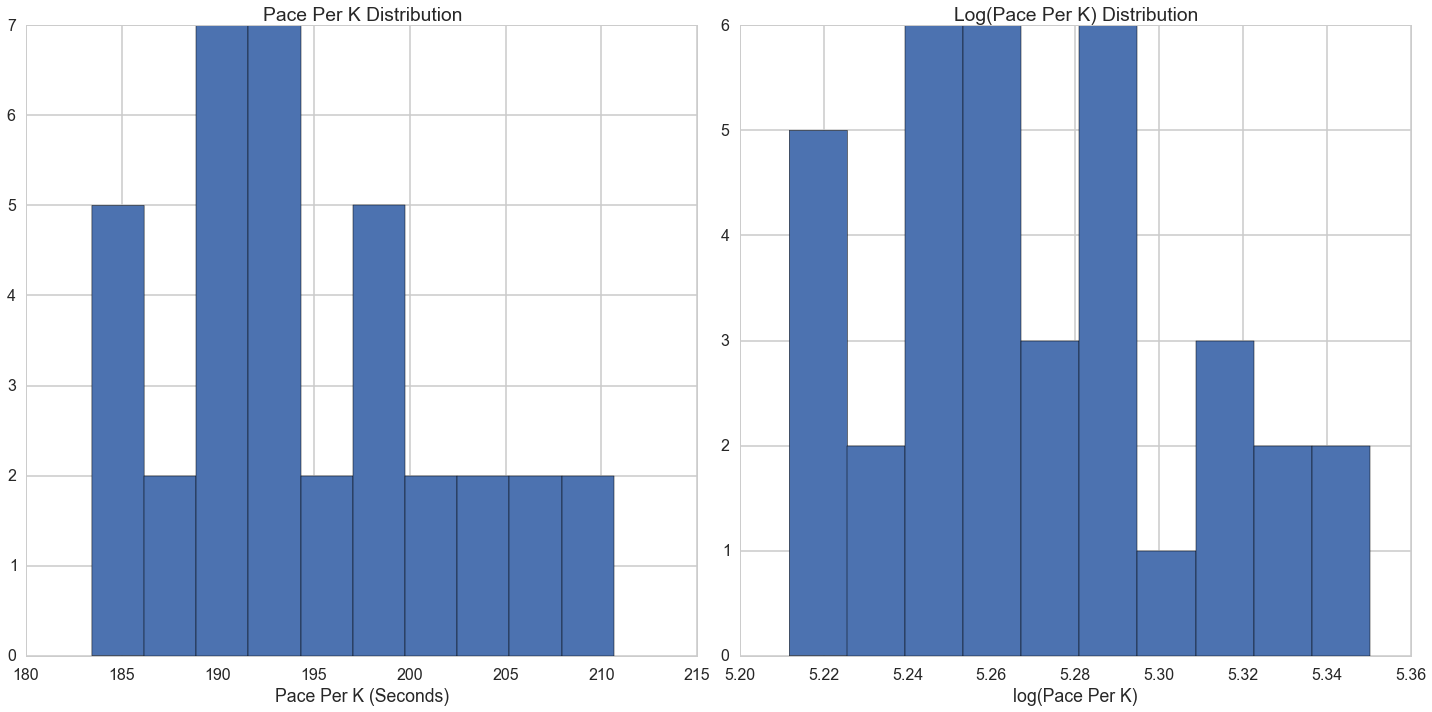

In [14]:
df = pd.read_csv('final_race_df.csv')
y_vars_temp = df.pace_per_k.values
y_vars = []
for i in y_vars_temp:
    if ~np.isnan(i):
        y_vars.append(i)
data = [y_vars, np.log(y_vars)]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10), tight_layout=True)
for ax, i in zip(axes.ravel(), range(0, len(data))):
    ax.hist(data[i])
    if i == 0:
        ax.set_xlabel('Pace Per K (Seconds)')
        ax.set_title('Pace Per K Distribution')
    elif i == 1:
        ax.set_xlabel('log(Pace Per K)')
        ax.set_title('Log(Pace Per K) Distribution')